# Importing all the Corpora included in NLTK 

In [1]:
#importing nltk
import nltk

#installing all the custom corpora
nltk.download()

import os, os.path
path = os.path.expanduser("~/nltk_data")
if not os.path.exists(path):
    os.mkdir(path)
print("\n")
print ("Path Exists = ", os.path.exists(path))
import nltk.data
print ("Path Exists in NLTK = ", path in nltk.data.path)



Path Exists =  True
Path Exists in NLTK =  True


--------------------------------------------------------------------------------

# 1) Word Frequency Identification :-

### Using the UDHR (Universal Declaration of Human Rights) Corpus to examine the differences in word lengths for a selection of   
languages included in this corpus

[nltk_data] Downloading package udhr to C:\Users\ADMIN/nltk_data...
[nltk_data]   Package udhr is already up-to-date!


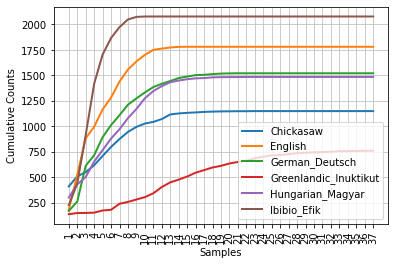

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [2]:
# importing nltk
import nltk 

# downloading the udhr package
nltk.download('udhr')

# importing the corpus udhr
from nltk.corpus import udhr

#selected languages for testing
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

# examining the difference in word lengths
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

# plotting the Samples vs Counts curve
cfd.plot(cumulative=True)

### Using the WebText Corpus to count the number of words in this corpus having a frequency of greater than 3

[nltk_data] Downloading package webtext to C:\Users\ADMIN/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


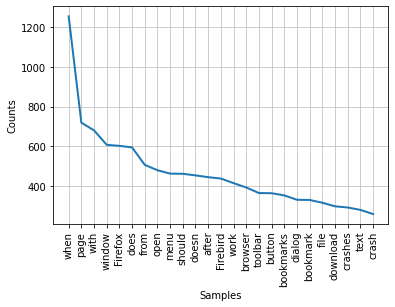

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [3]:
# importing nltk 
import nltk

# downloading the webtext package
nltk.download('webtext')

# importing the webtext corpus
from nltk.corpus import webtext
wt_words = webtext.words('firefox.txt')
data_analysis = nltk.FreqDist(wt_words)

# taking the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
data_analysis = nltk.FreqDist(filter_words)

# plotting the Words vs Counts curve
data_analysis.plot(25, cumulative=False)

### Using the Names Corpus, which contains 8000 first names categorized by gender, to find names which appear in both files, i.e. names that are ambiguous for gender. The male and female names are stored in separate files

[nltk_data] Downloading package names to C:\Users\ADMIN/nltk_data...
[nltk_data]   Package names is already up-to-date!


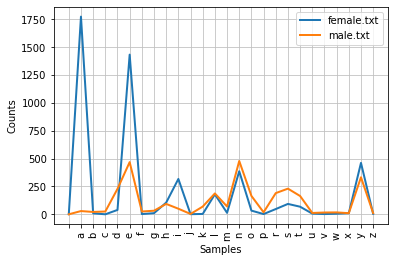

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
# importing nltk 
import nltk

# downloading the names package 
nltk.download('names')

# importing the names corpus and storing it in a variable 
names = nltk.corpus.names

# comparing the gender-wise ambiguous names
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))

# plotting the Samples vs Counts curve
cfd.plot()

--------------------------------------------------------------------------------

# 2) Corpus Annotation (POS Tagging) :-

### Using a section of the Gutenberg Corpus to add POS tags for each individual word

In [5]:
# importing the required corpora and dependencies
import nltk
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.corpus import gutenberg

# using english stop words
stop_words = set(stopwords.words('english'))

# importing the file "bible-kjv.txt" from the gutenberg corpus
txt = gutenberg.raw("bible-kjv.txt")  

# tokenizing the text file from the corpus
tok = sent_tokenize(txt)

# extracting a section out of the file
tokenize = tok[5:15]

# tagging 
for i in tokenize:
    wordsList = nltk.word_tokenize(i)
    wordsList = [w for w in wordsList if not w in stop_words] 
    tagged = nltk.pos_tag(wordsList)
    print(tagged)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ADMIN/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ADMIN/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('1:5', 'CD'), ('And', 'CC'), ('God', 'NNP'), ('called', 'VBD'), ('light', 'JJ'), ('Day', 'NNP'), (',', ','), ('darkness', 'NN'), ('called', 'VBD'), ('Night', 'NNP'), ('.', '.')]
[('And', 'CC'), ('evening', 'VBG'), ('morning', 'NN'), ('first', 'RB'), ('day', 'NN'), ('.', '.')]
[('1:6', 'CD'), ('And', 'CC'), ('God', 'NNP'), ('said', 'VBD'), (',', ','), ('Let', 'NNP'), ('firmament', 'NN'), ('midst', 'NN'), ('waters', 'NNS'), (',', ','), ('let', 'VB'), ('divide', 'JJ'), ('waters', 'NNS'), ('waters', 'NNS'), ('.', '.')]
[('1:7', 'CD'), ('And', 'CC'), ('God', 'NNP'), ('made', 'VBD'), ('firmament', 'NN'), (',', ','), ('divided', 'VBD'), ('waters', 'NNS'), ('firmament', 'JJ'), ('waters', 'NNS'), ('firmament', 'NN'), (':', ':'), ('.', '.')]
[('1:8', 'CD'), ('And', 'CC'), ('God', 'NNP'), ('called', 'VBD'), ('firmament', 'JJ'), ('Heaven', 'NNP'), ('.', '.')]
[('And', 'CC'), ('evening', 'VBG'), ('morning', 'NN'), ('second', 'JJ'), ('day', 'NN'), ('.', '.')]
[('1:9', 'CD'), ('And', 'CC'), ('God',

### Using the Brown Corpus to find out the words that are highly ambiguous as to their part of speech tag

In [6]:
# importing the required dependencies and corpus
import nltk
nltk.download('brown')
nltk.download('universal_tagset')
from nltk.corpus import brown

# tagging the words from the news category
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

# testing for ambiguity among the POS tags
data = nltk.ConditionalFreqDist((word.lower(), tag)
for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

[nltk_data] Downloading package brown to C:\Users\ADMIN/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\ADMIN/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


--------------------------------------------------------------------------------

# 3) Creating Parse Trees using the Treebank Corpus

### Parse Tree 1 

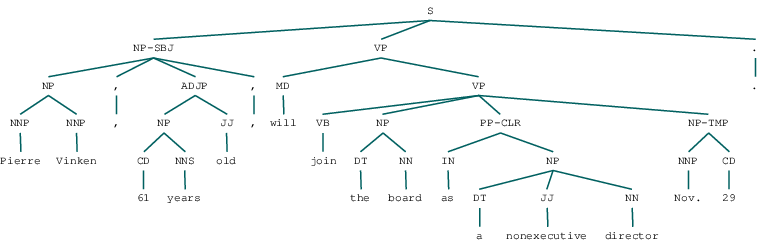

In [14]:
from IPython.display import display

# importing thr treebank corpus
from nltk.corpus import treebank

# parsing the file
tree1 = treebank.parsed_sents('wsj_0001.mrg')[0]

# displaying the parse tree
display(tree1)


### Parse Tree 2

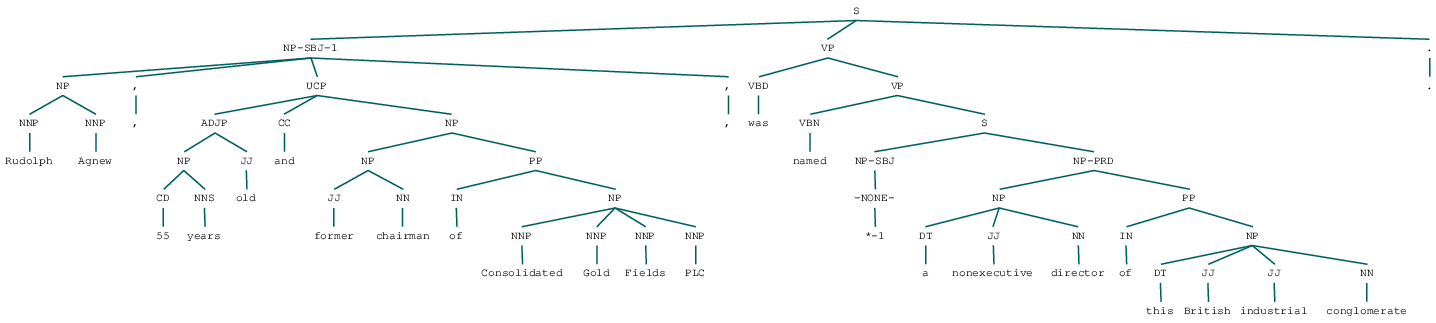

In [16]:
# importing the display function
from IPython.display import display

# importing thr treebank corpus
from nltk.corpus import treebank

# parsing the file
tree2 = treebank.parsed_sents('wsj_0002.mrg')[0]

# displaying the parse tree
display(tree2)